In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
M = 25                               # grid size MxM
V = 1.0                              # top wall Vo
target = 1e-4                        # accuracy
phi = np.zeros([M+1,M+1],float)      # previous iteration
phiprime = np.empty([M+1,M+1],float) # current interation
phi[:,0] = V                         # boundary condition
 
#xwire,ywire = 12,5                   # wire location
#phi[xwire,ywire] = 0                 # grounded wire    

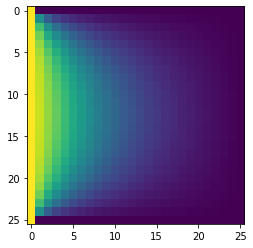

In [5]:
delta = 1.0 # iteratiob dV

while delta > target:
    
    for i in range(M+1):
        for j in range(M+1):
            
            if i==0 or i==M or j==0 or j==M: # boundary conditions
                phiprime[i,j] = phi[i,j]
#            elif i==xwire and j==ywire:      # boundary conditions
#                phiprime[i,j] = phi[i,j]  
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4

    delta = np.max(abs(phi-phiprime))       # iteration max difference
    phi,phiprime = phiprime,phi
    
plt.imshow(phi) # note it's rotated

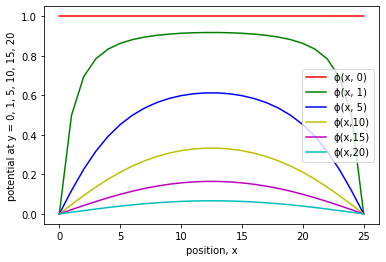

In [7]:
plt.plot(phi[:, 0],"r-",label="ϕ(x, 0)")
plt.plot(phi[:, 1],"g-",label="ϕ(x, 1)")
plt.plot(phi[:, 5],"b-",label="ϕ(x, 5)")
plt.plot(phi[:,10],"y-",label="ϕ(x,10)")
plt.plot(phi[:,15],"m-",label="ϕ(x,15)")
plt.plot(phi[:,20],"c-",label="ϕ(x,20)")
plt.ylabel("potential at y = 0, 1, 5, 10, 15, 20")
plt.xlabel("position, x") 
plt.legend()